In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
## importing models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
## for Evluation of models 
from sklearn.model_selection import train_test_split , cross_val_score 
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.metrics import precision_score ,recall_score , f1_score
from sklearn.metrics import RocCurveDisplay


In [5]:
df = pd.read_csv("heart-disease (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Now after importing the data set we try to find relations and patterns in the data that will help us Figure our a way to predict the further things 

The Data Exploration checklist that we might want to start with 
1 , one's the data is loaded go back to the problem and try to see what exaclty are we trying to predict 
2 . Look at the data and figure out what kind of data we Have and how we might deal with the data
3. What's missing from the data and how are you going to fill the missing part of the data 
4. Where are the outliners and why should we care about them 
5 . manipuplating Features from the data to figure out how to get more out of the data i.e dealing with the features of the data 

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

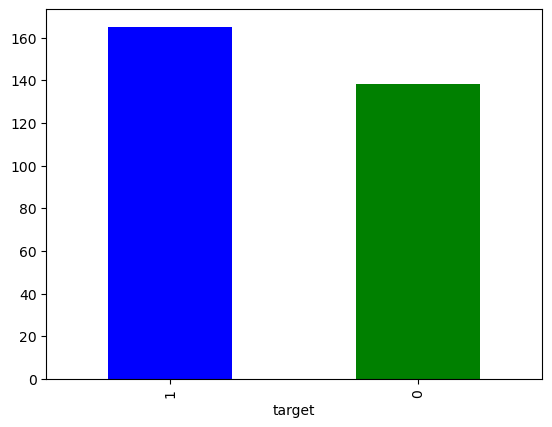

In [17]:
df["target"].value_counts().plot(kind = "bar" , color = ["blue" , "green"])

In [18]:
df.info()  ## --> tell us more about the data in details  and the changes that are required to be done 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
 df.isna().sum()     ## checking weather there are any missing values of the data 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
## ploting a crosstab for the disease on the basis of sex
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [23]:
pd.crosstab(df.sex , df.target)

target,0,1
sex,,
0,24,72
1,114,93


<Axes: xlabel='sex'>

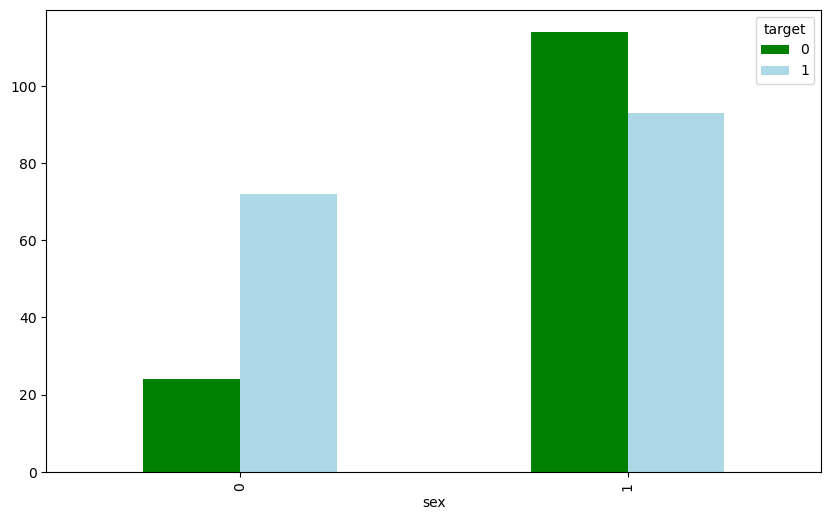

In [28]:
## Plotting the CrossTab to have a Better Visulasation of Data 
pd.crosstab(df.sex , df.target ).plot(kind = "bar" , figsize = (10,6) , color = ["green" , "lightblue"])

In [29]:
## comparing the thalac (i.e the maximum heartRate with age and heart desiase ) 
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

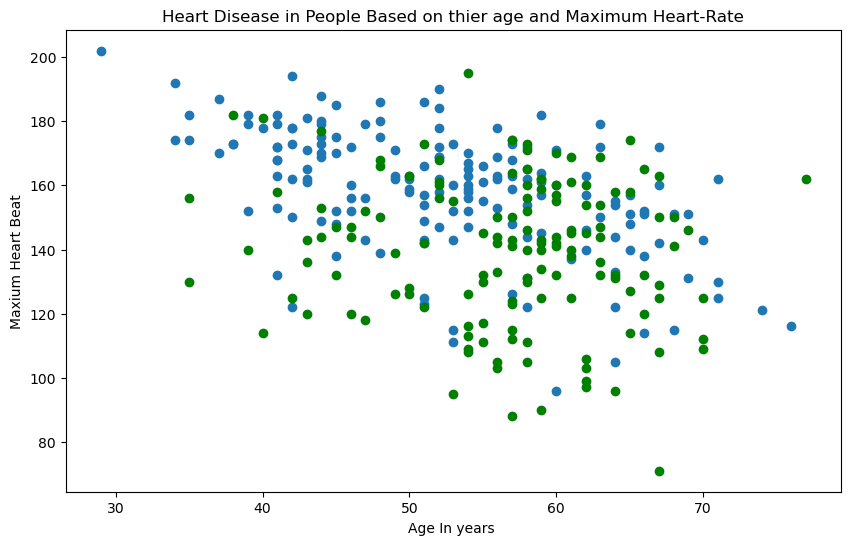

In [42]:
plt.figure(figsize = (10,6))
plt.title("Heart Disease in People Based on thier age and Maximum Heart-Rate")
plt.xlabel("Age In years ")
plt.ylabel("Maxium Heart Beat" )
plt.scatter(df.age[df.target ==1 ], df.thalach[df.target ==1]);
plt.scatter(df.age[df.target ==0 ], df.thalach[df.target ==0], c = "green");


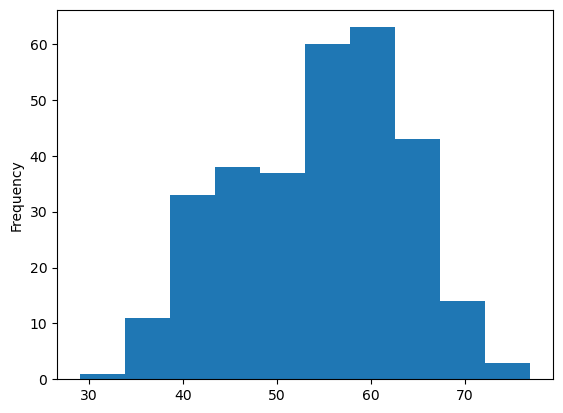

In [44]:
## Checking the distrubutiom of the age 
df.age.plot.hist();


In [45]:
## Comparing Chest-Pain with the heart Disease 
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0, 0.5, 'No of people having Heart Disease ')

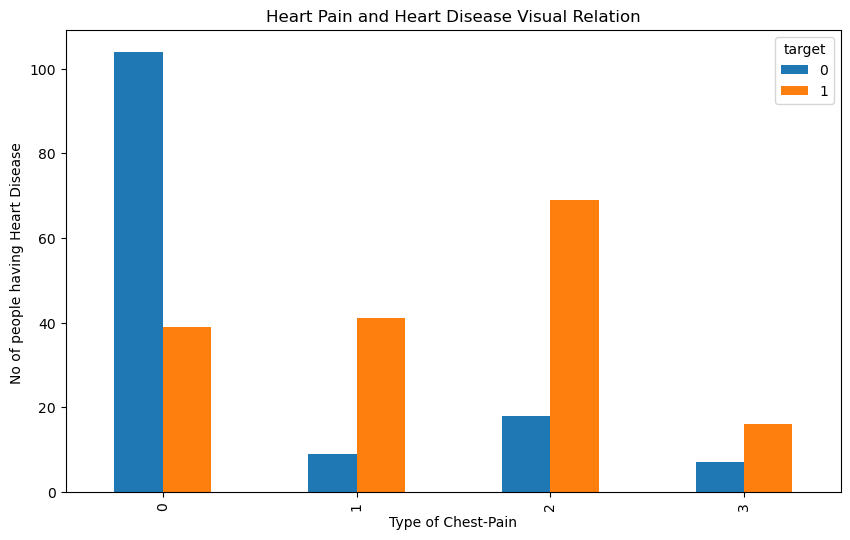

In [47]:
## ploting the heart-disease  in Bar Graph 
pd.crosstab(df.cp , df.target ).plot(kind = "bar" , figsize = (10,6) )
plt.title("Heart Pain and Heart Disease Visual Relation")
plt.xlabel("Type of Chest-Pain")
plt.ylabel("No of people having Heart Disease ")

In [48]:
## Making a co-relatiom matrix 
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


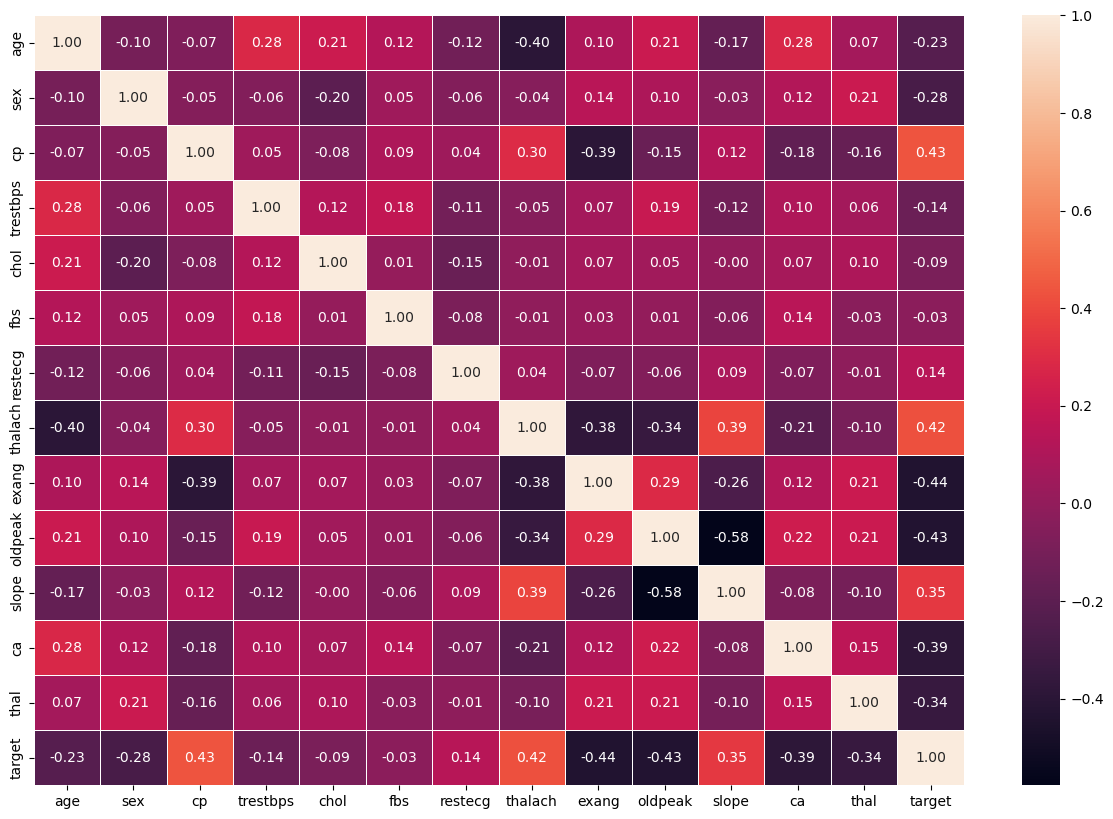

In [50]:
corr_mat = df.corr()
fig , ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_mat , annot = True ,fmt = ".2f" ,linewidths= 0.5 );


In [11]:
## spliting the data now to train our model and then test it 
X = df.drop("target",axis =1)
Y = df["target"]
X_train ,X_Test , Y_train ,Y_Test = train_test_split(X,Y, test_size = 0.2)
clf = LogisticRegression(max_iter = 10000)
clf.fit(X_train , Y_train , )

LogisticRegression(max_iter=10000)

In [67]:
clf.score(X_Test , Y_test)

0.8360655737704918

## note i did not try any other model because i was able to find out the best model to be used as i was checking it one by one 
    tuning Logistics Regression using RandomisedSearchCv 


In [15]:
log_reg_grid = { "C" : np.logspace(-4, 4, 20) , "solver" : ["liblinear"]}


In [16]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression() , param_distributions = log_reg_grid , cv = 5 , n_iter = 20 ,verbose = True)
rs_log_reg.fit(X_train ,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [18]:
rs_log_reg.score(X_Test ,Y_Test)

0.8852459016393442

In [19]:
## Now we will be Using GridSearchCv --> As the Scores are quite good with LogisticRegression we can proceed with tuning this model 
## trying to make this model better rahter than looking for diffrent model 
## --> Imporoving the model <--

In [35]:
log_reg_grid = { "C" : np.logspace(-4, 4, 30) , "solver" : ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression() , param_grid = log_reg_grid , cv = 5 , verbose = True)
gs_log_reg.fit(X_train , Y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log_reg.score(X_Test , Y_Test)

0.8688524590163934

## Now Evluating the Machine Learning Model Beyond Just accuracy 
* ROC and  AUC Score 
* Confusion Matrix
* Classification Report 
* Precision 
* recall 
* F1-Score 



In [57]:
y_preds = gs_log_reg.predict(X_Test)
y_preds

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [42]:
Y_Test

193    0
33     1
15     1
49     1
57     1
      ..
93     1
3      1
188    0
77     1
291    0
Name: target, Length: 61, dtype: int64

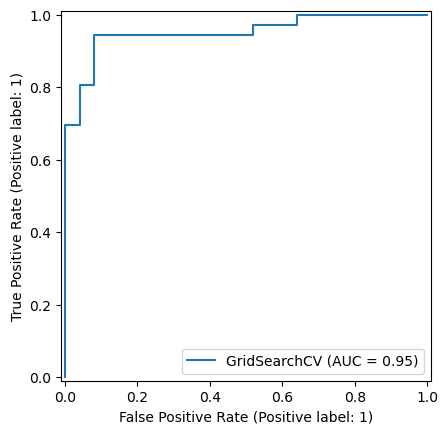

In [50]:
RocCurveDisplay.from_estimator(gs_log_reg, X_Test, Y_Test);

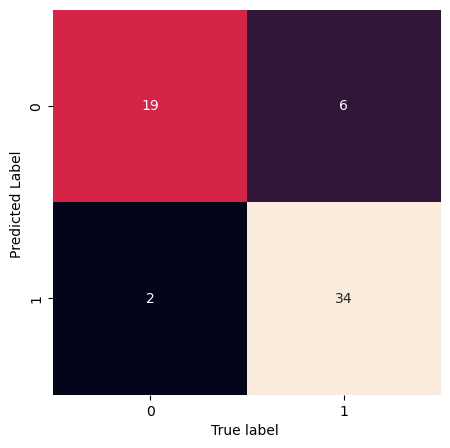

In [59]:
## ploting a confuison matrix 
def plot_con_mat(Y_Test , y_preds) :
    fig , ax = plt.subplots(figsize =(5,5) )
    ax = sns.heatmap(confusion_matrix(Y_Test ,y_preds),annot = True , cbar = False )
    plt.xlabel("True label ")
    plt.ylabel("Predicted Label ")


plot_con_mat(Y_Test, y_preds)
    
                            
    
    

In [60]:
print(classification_report(Y_Test , y_preds))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.85      0.94      0.89        36

    accuracy                           0.87        61
   macro avg       0.88      0.85      0.86        61
weighted avg       0.87      0.87      0.87        61



## My weighted score is 87%  can be done using more HyperTuning 
## The Data was Calculated on one Test-Split Data Rather than calculating it on every Data we are now going to use the Cross-Validation Sets to Evluate our data 